In [1]:
from IPython.display import Image

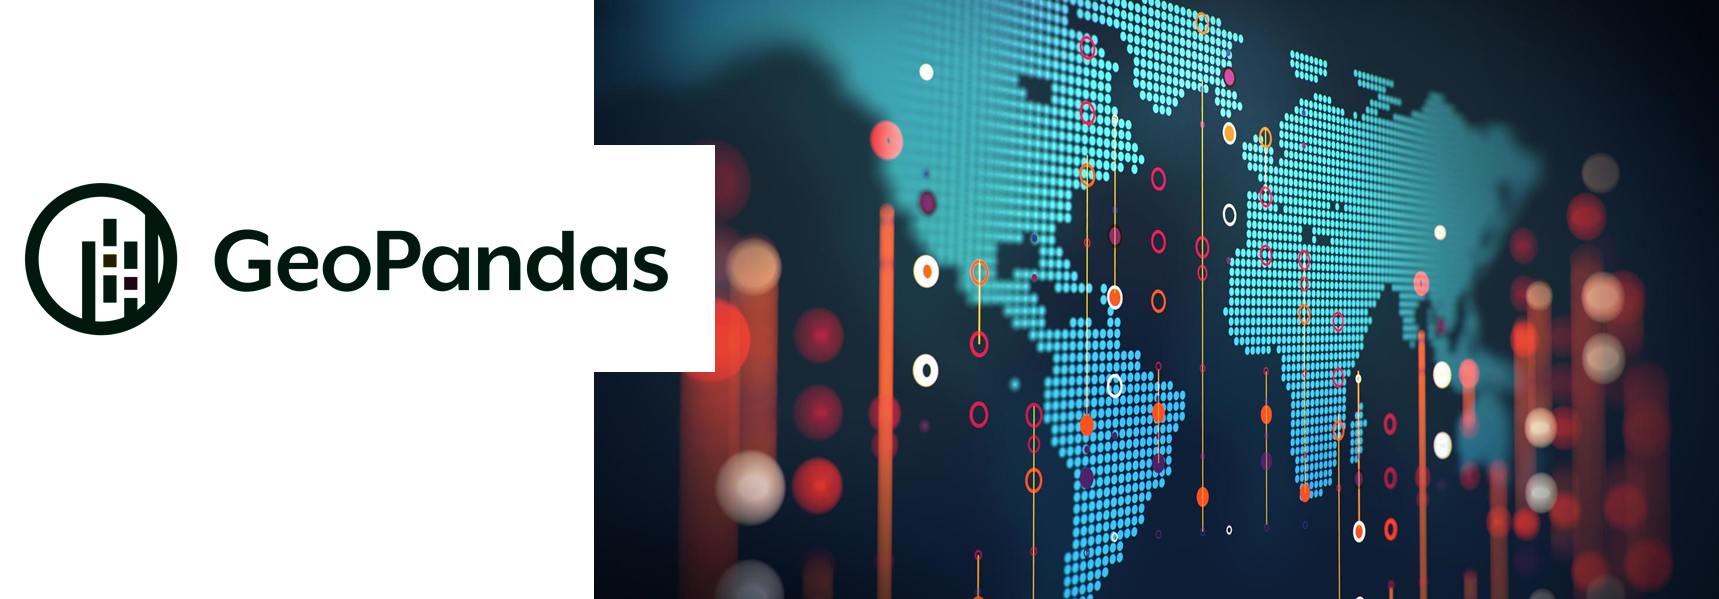

In [2]:
Image(filename='geo.png')

by [Abraão Nascimento](https://www.linkedin.com/in/abra%C3%A3o-nascimento-39915162/)
# Why Geopandas? 

[Geopandas](https://geopandas.org/)  is one of the most powerful ways to work with geospatial data currently. Also, it is an open-source project to make working with geospatial data in python easier. It combines the capabilities of two powerful python libraries: pandas and shapely, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely.

## Agenda:
__1.__ Set up environment<br>
__2.__ Read and visualize geospatial data <br>
__3.__ Plot, manipulate and execute geospatial operations <br>
__4.__ Salve your geospatial data <br>
__5.__ Mention <br>

### 1. Set up environment

Setting up your environment with github, docker and binder: https://mybinder.org/v2/gh/abraaonascimento/1_Hour_Geopandas_Training/HEAD


In [ ]:
pip install rtree

In [ ]:
pip install pygeos

In [ ]:
pip install geopandas

In [ ]:
pip install matplotlib

In [3]:
import geopandas 

### 2. Read and visualize geospatial data
Geospatial data is available from specific GIS file formats like ESRI shapefiles, Geodatabase, GeoJSON files, geopackage files, PostgreSQL/PostGIS, etc. 

It is possible to use the GeoPandas library to read most all those GIS file formats since Geopandas uses GDAL/OGR in the background. 

Let's start by reading a shapefile with all the countries of the world (adapted from [naturalearthdata](http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/), zip file is available in the /data directory), and inspect the data:

In [4]:
countries = geopandas.read_file("zip://./data/countries.zip")

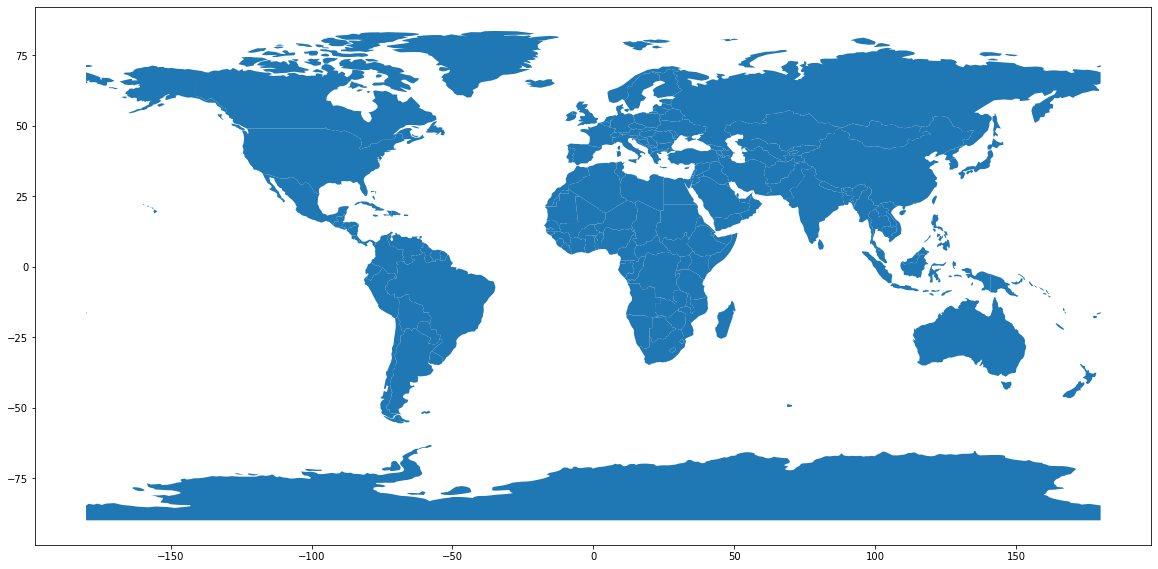

In [5]:
countries.plot(figsize=(20,20)) 
#countries.plot(figsize=(20,20)) 

In [6]:
countries.head(20)

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.211 35.650, 62.231 35.271, 62.985..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.904 -11.722, 24.080 -12.191..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.020 40.843, 21.000 40.580, 20.675..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.580 24.245, 51.757 24.294, 51.794..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-66.960 -54.897, -67.562 -54.8..."
5,ARM,Armenia,Asia,3045191.0,26300.0,"POLYGON ((43.583 41.092, 44.972 41.248, 45.179..."
6,ATA,Antarctica,Antarctica,4050.0,810.0,"MULTIPOLYGON (((-59.572 -80.040, -59.866 -80.5..."
7,ATF,Fr. S. Antarctic Lands,Seven seas (open ocean),140.0,16.0,"POLYGON ((68.935 -48.625, 69.580 -48.940, 70.5..."
8,AUS,Australia,Oceania,23232413.0,1189000.0,"MULTIPOLYGON (((145.398 -40.793, 146.364 -41.1..."
9,AUT,Austria,Europe,8754413.0,416600.0,"POLYGON ((16.980 48.123, 16.904 47.715, 16.341..."


As was presented above:

- By using .plot() method we can quickly get a basic visualization of the data
- By using .head() method we can see the first rows of the dataset, just like in excel or QGIS. 
- There is a 'geometry' column that keeps the geoinformation of the countries represented as polygons.

### 3. Plot, manipulate and execute geospatial operations

Such as ESRI shapefiles Geopandas dataframe format contains **attributes** (fields and records) and **geometry** (coordinates). Such as in QGIS we can use function and filter to manipulate the geodata

### Filtering

In [7]:
lam = countries[countries['continent'] == 'South America']

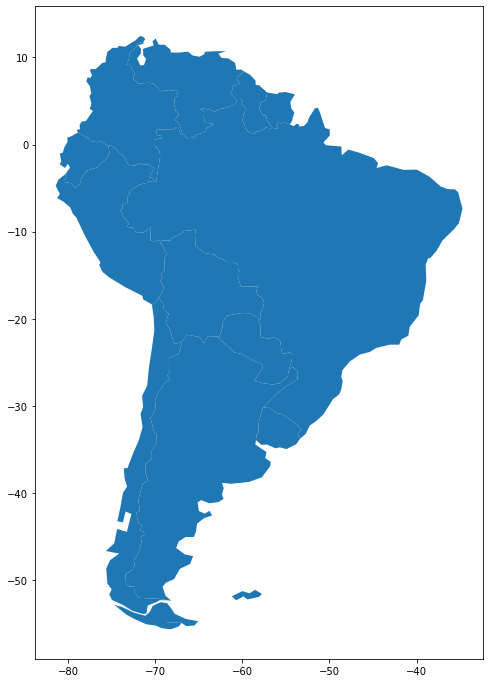

In [8]:
lam.plot(figsize=(12,12))

In [9]:
bra = countries[countries['name'] == 'Brazil']

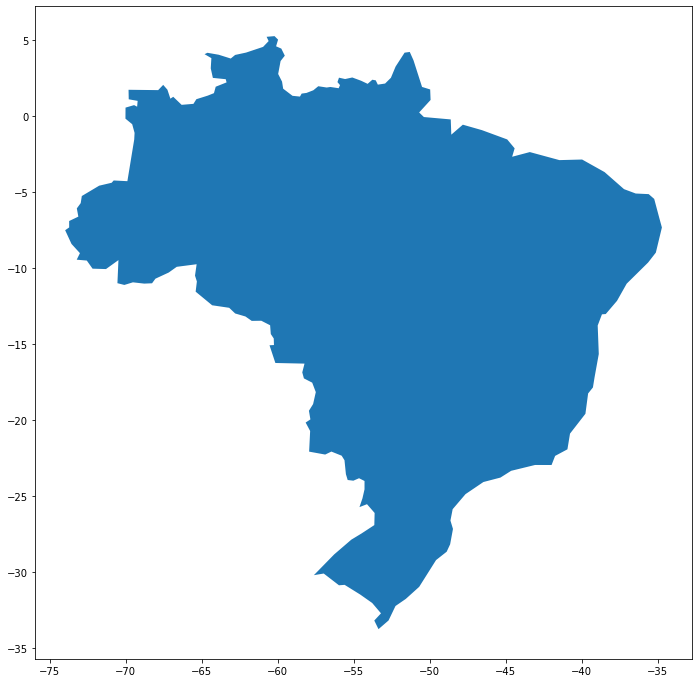

In [10]:
bra.plot(figsize=(12,12))

### Population

In [11]:
bra['pop_est']

22    207353391.0
Name: pop_est, dtype: float64

In [12]:
"Population: " + "{:,}".format(int(bra['pop_est'].values[0]))

'Population: 207,353,391'

In [13]:
#"{:,}".format(bra.area.values[0])

### Coordinate reference systems

In [14]:
bra.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
bra_utm = bra.to_crs(epsg=3395)

In [16]:
bra_utm.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - between 80°S and 84°N
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Geometries types: points, lines and polygons
Until now, we worked only with Polygons. Let's import points from that represents cities and lines that will represent the road-network. Here we will use data from [DNIT](http://servicos.dnit.gov.br/vgeo/) (National Department of Transport Infrastructure) and  [Natural Earth Data](http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-populated-places/)

In [17]:
cities = geopandas.read_file("zip://./data/cities.zip")
roads  = geopandas.read_file("zip://./data/roads.zip")

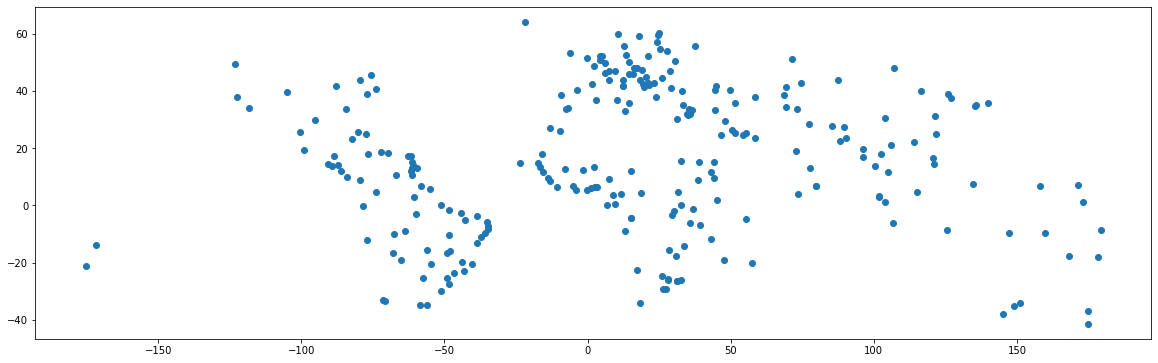

In [18]:
cities.plot(figsize=(20,20))

In [19]:
#cities.head(50)

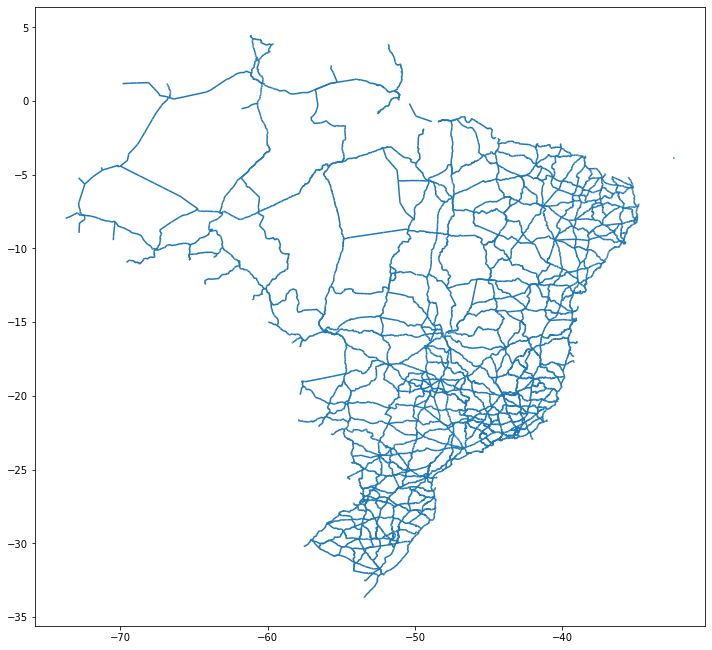

In [20]:
roads.plot(figsize=(12,12))

In [21]:
#roads.head() 

### Visualize different layers together

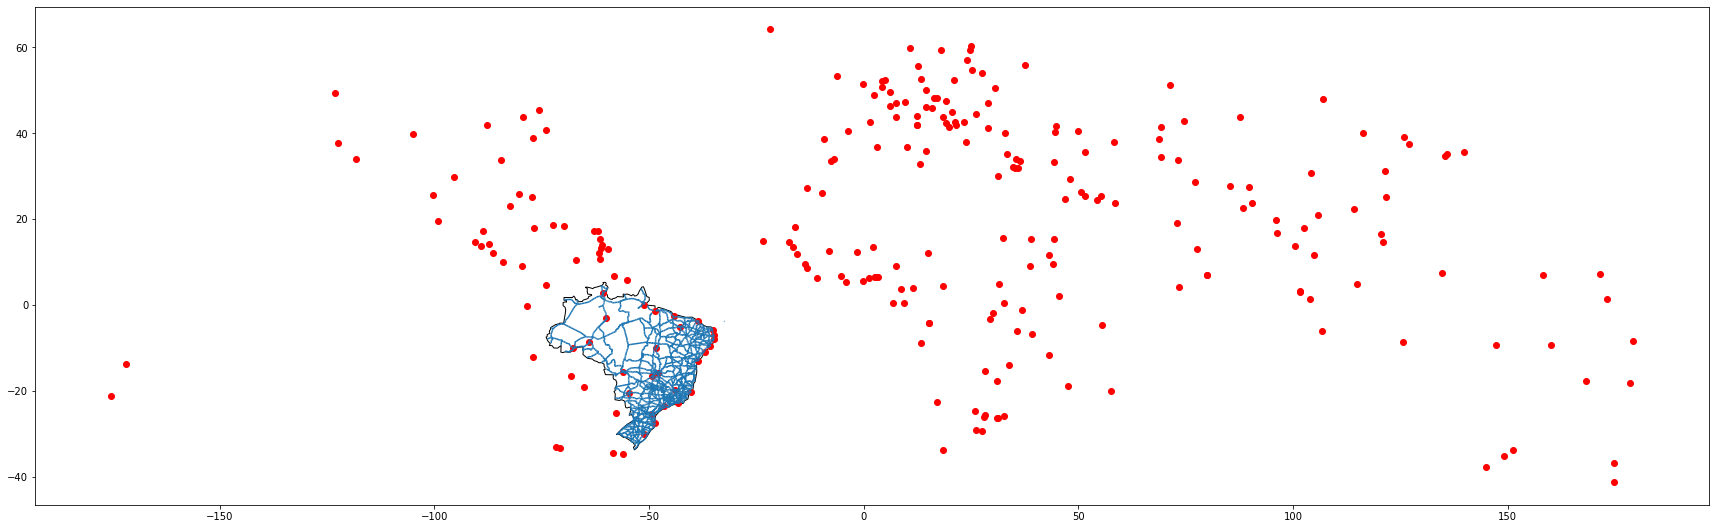

In [22]:
ax = bra.plot(edgecolor='k', facecolor='none', figsize=(30, 30))
roads.plot(ax=ax)
cities.plot(ax=ax, color='red')

[(-40.0, 10.0), (-80.0, -30.0)]

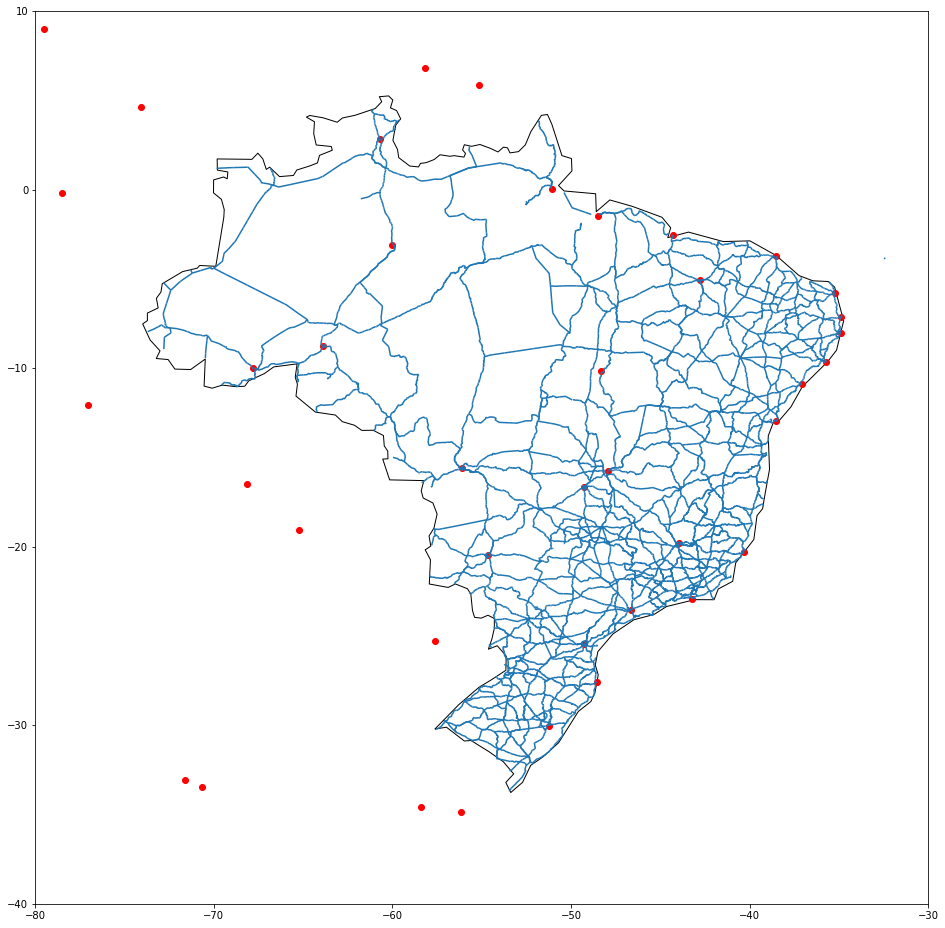

In [23]:
ax = bra.plot(edgecolor='k', facecolor='none', figsize=(16, 20))
roads.plot(ax=ax)
cities.plot(ax=ax, color='red')
ax.set(xlim=(-80, -30), ylim=(-40, 10))

### Geospatial operations

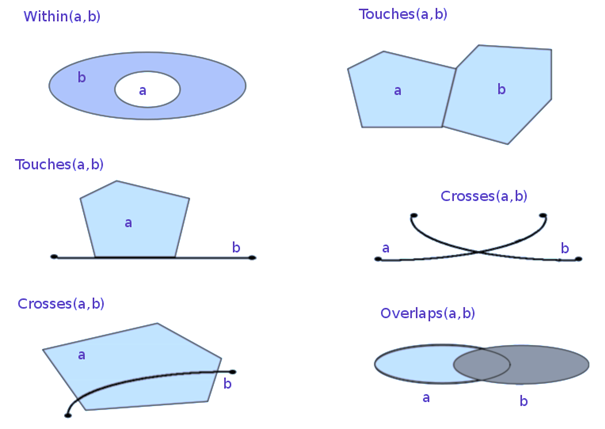

In [24]:
Image(filename='spatial_operations.png')

Overview of functions to check spatial relationships:

- equals
- crosses
- overlaps
- touches
- `intersects`
- `within`

To check more manipulation and analysis of geometric objects please check the [Shapely User Manual](https://shapely.readthedocs.io/en/stable/manual.html#predicates-and-relationships). 

<div class="alert alert-info" style="font-size:120%">
<b>EXERCISE</b> 
<ul>
  <li>Which cities pass within Brazil?</li>
  <li>Which roads intersects the urban areas in Brazil? </li>
</ul>

</div>


We already have the geometry of Brazil selected in the variable 'bra'. Let's use it to find the cities within the Brazil's polygon 

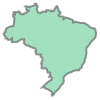

In [25]:
bra.geometry.squeeze()

In [26]:
bra_geometry = bra.geometry.squeeze()

In [27]:
bra_cities = cities[cities.within(bra_geometry)] 

In [29]:
bra_cities.head(10)

,name,geometry
0,Aracaju/SE,POINT (-37.07232 -10.91151)
1,Belém/PA,POINT (-48.50440 -1.45644)
2,Belo Horizonte/MG,POINT (-43.95639 -19.81754)
3,Boa Vista/RR,POINT (-60.67347 2.81958)
4,Brasília/DF,POINT (-47.93041 -15.78052)
5,Campo Grande/MS,POINT (-54.64647 -20.44352)
6,Cuiabá/MT,POINT (-56.09746 -15.59650)
7,Curitiba/PR,POINT (-49.27345 -25.42855)
9,Fortaleza/CE,POINT (-38.54333 -3.71746)
10,Goiânia/GO,POINT (-49.25443 -16.67952)


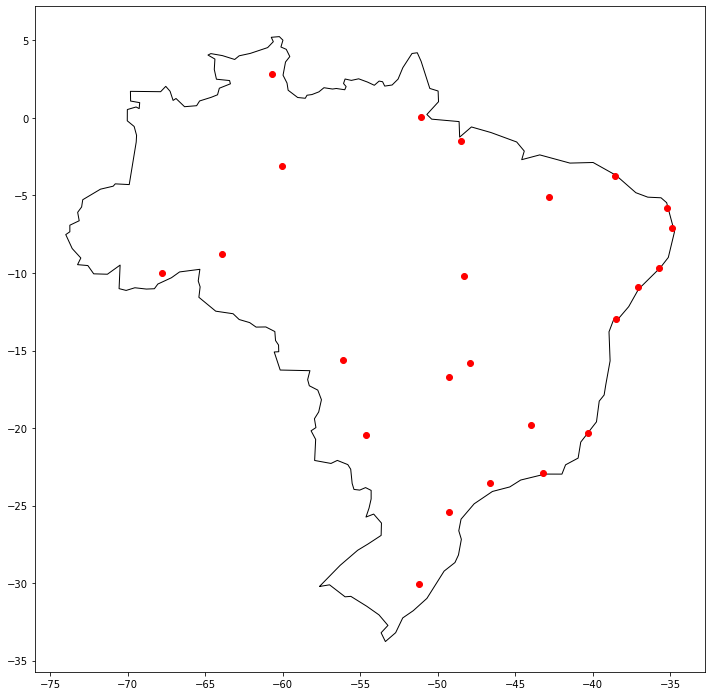

In [30]:
ax = bra.plot(edgecolor='k', facecolor='none', figsize=(12, 20))
bra_cities.plot(ax=ax, color='red')

To simulate urban areas we can create buffers using the POINT objects that represents the filtered cities within Brazil

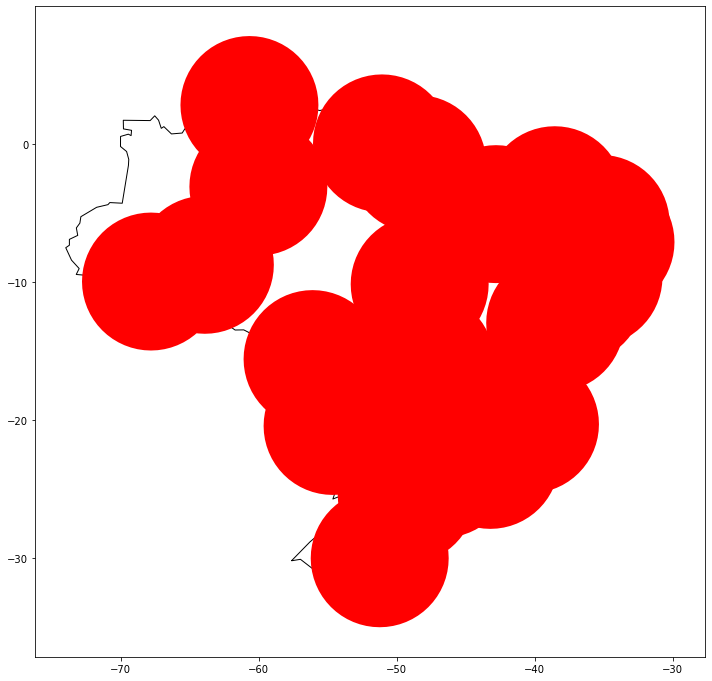

In [31]:
ax = bra.plot(edgecolor='k', facecolor='none', figsize=(12, 20))
bra_cities.buffer(5).plot(ax=ax,color='red')

<div  style="font-size:100%" background-color="tomato">
<b>NOTE</b> 
<ul>
 <li>Within the buffer function, it was used the number 5 '.buffer(5)'. In this case, 5 means 5 degrees. This is the reason why we got large buffers.</li>
  <li>To convert degrees to meters, we can transform the geographic coordinate system to a '2D' cartesian plan. That is also the possibility to manually convert degrees to meters, but it is not pratical</li>
     <li> Approximate metric equivalents for degrees: 0.00001° = 1.11 meters </li>
</ul>

</div>

In [32]:
cities = bra_cities.to_crs(epsg=3395)  # 1. Converting geographic to a metric coordinate system

In [33]:
urban_areas = cities.buffer(50000)     # 2. Creating 50km buffer

In [34]:
urban_areas = urban_areas.to_crs(epsg=4326) # 3. Converting back: metric to geographic coordinate system

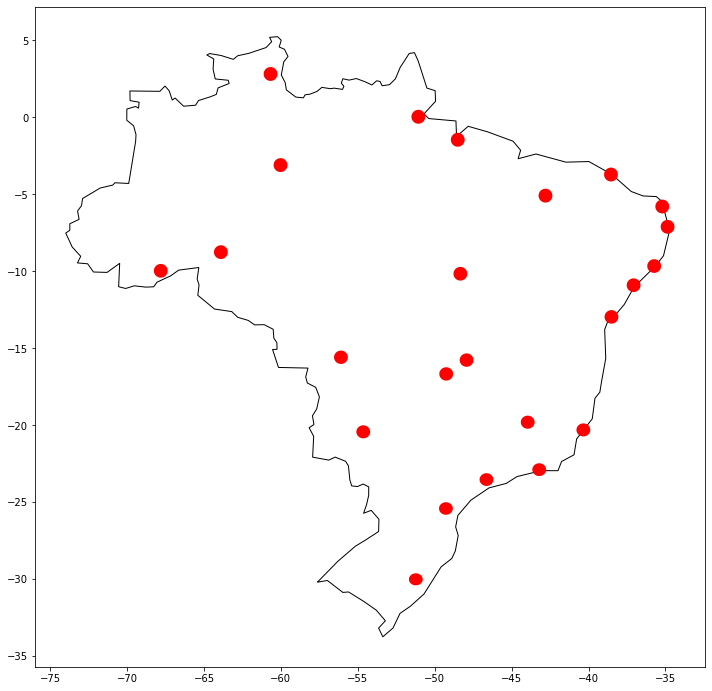

In [35]:
ax = bra.plot(edgecolor='k', facecolor='none', figsize=(12, 20))
urban_areas.plot(ax=ax,color='red')

<div  style="font-size:100%" background-color="tomato">
<b>NOTE</b> 
<ul>
 <li>The buffer function gives back just the geometry. This operation does not keet the attributes</li>
  <li>To get the attributes back we can replace the cities 'points' (city center) with cities 'polygons' (urban areas)</li>
</ul>

</div>

In [36]:
urban_areas

0     POLYGON ((-36.62316 -10.91151, -36.62532 -10.9...
1     POLYGON ((-48.05524 -1.45644, -48.05740 -1.500...
2     POLYGON ((-43.50723 -19.81754, -43.50940 -19.8...
3     POLYGON ((-60.22431 2.81958, -60.22647 2.77531...
4     POLYGON ((-47.48125 -15.78052, -47.48341 -15.8...
5     POLYGON ((-54.19731 -20.44352, -54.19947 -20.4...
6     POLYGON ((-55.64830 -15.59650, -55.65047 -15.6...
7     POLYGON ((-48.82429 -25.42855, -48.82645 -25.4...
9     POLYGON ((-38.09417 -3.71746, -38.09633 -3.761...
10    POLYGON ((-48.80527 -16.67952, -48.80743 -16.7...
11    POLYGON ((-34.41414 -7.11549, -34.41631 -7.159...
12    POLYGON ((-50.61726 0.03857, -50.61942 -0.0057...
13    POLYGON ((-35.28615 -9.66650, -35.28831 -9.710...
14    POLYGON ((-59.57631 -3.10245, -59.57847 -3.146...
15    POLYGON ((-34.76015 -5.79548, -34.76231 -5.839...
16    POLYGON ((-47.88425 -10.16749, -47.88641 -10.2...
17    POLYGON ((-50.78132 -30.03355, -50.78349 -30.0...
18    POLYGON ((-63.45533 -8.76247, -63.45749 -8

In [37]:
bra_cities['geometry'] = urban_areas  # 4. Getting back the attributes 

With the 50km buffer created it is possible to get all the roads that intersects our simulated urban areas 

In [39]:
urban_roads = geopandas.sjoin(roads, bra_cities, op='intersects')  # 5. Find which roads intersects the urban capitals of Brazil by using spatial join. 

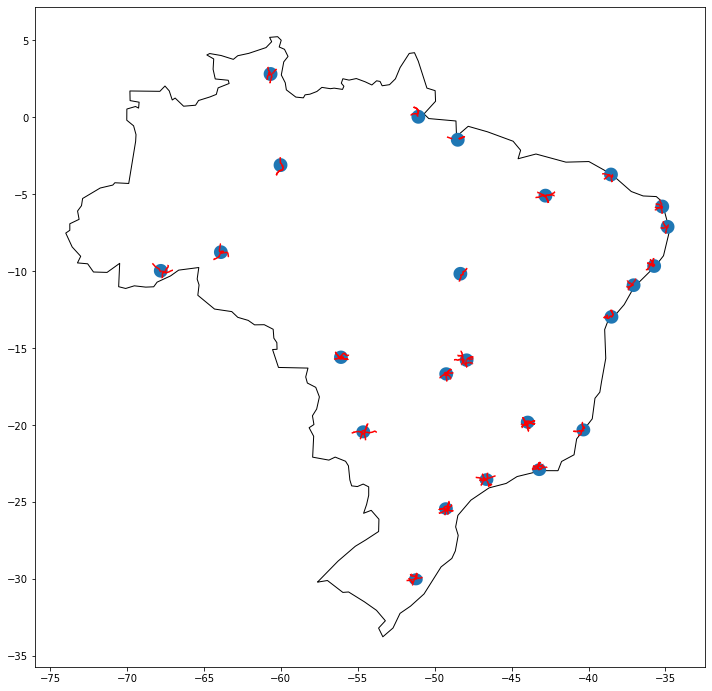

In [40]:
ax = bra.plot(edgecolor='k', facecolor='none', figsize=(12, 20))
#roads.plot(ax=ax)
bra_cities.plot(ax=ax)
urban_roads.plot(ax=ax,color='red')

### 4. Salve your geospatial data

To end let's save the data. In Geopandas we can save files in many formats: ESRI shapefiles, Geodatabase, GeoJSON files, geopackage files. You can check all the options in [Geopandas User Guide](https://geopandas.org/docs/user_guide/io.html). <br>
In this exercise, we will be saving the data in the ESRI Shapefile format. 

In [ ]:
bra.to_file("country_bra.shp")

In [ ]:
bra_cities.to_file("cities_bra.shp")

In [ ]:
urban_roads.to_file("urban_roads_bra.shp")

### 5. Mention 
This training was created based on the open resources:
 - [Geopandas - An Introduction](https://medium.com/thoughtful-data-science/geopandas-an-introduction-c544a352c662)
 - [Introduction to Geospatial Data Analysis with Python](https://github.com/geopandas/scipy2018-geospatial-data)
 - [Geopandas - User Guide](https://geopandas.org/index.html)
 - [Shapely - User Guide](https://shapely.readthedocs.io/en/stable/manual.html)


### Thank you!